In [1]:
# dependencies

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:/Testing/DA/sales_train.csv')
test = pd.read_csv('C:/Testing/DA/test.csv')
sample_submission = pd.read_csv('C:/Testing/DA/sample_submission.csv')
items = pd.read_csv('C:/Testing/DA/items.csv')
item_cats = pd.read_csv('C:/Testing/DA/item_categories.csv')
shops = pd.read_csv('C:/Testing/DA/shops.csv')

In [3]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [4]:
all_data = train[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']].merge(items[['item_name', 'item_id', 'item_category_id']], on='item_id', how='left')
all_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57


In [5]:
all_data = all_data[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'item_name', 'item_id', 'item_category_id']].merge(item_cats[['item_category_name', 'item_category_id']], on='item_category_id', how='left')

In [6]:
all_data = all_data[['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'item_name', 'item_category_id', 'item_category_name']].merge(shops[['shop_name', 'shop_id']], on='shop_id', how='left')

In [7]:
all_data['date'] = pd.to_datetime(all_data.date, format='%d.%m.%Y')
all_data

,date,date_block_num,shop_id,item_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,2015-10-09,33,25,7460,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,2015-10-14,33,25,7459,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,2015-10-22,33,25,7440,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [8]:
all_data.to_csv ('C:\Testing\DA\Result\DA_Data.csv', index = False, header=True)#

In [9]:
all_data_working = all_data[['date', 'item_price']]
all_data_working

,date,item_price
0,2013-01-02,999.00
1,2013-01-03,899.00
2,2013-01-05,899.00
3,2013-01-06,1709.05
4,2013-01-15,1099.00
...,...,...
2935844,2015-10-10,299.00
2935845,2015-10-09,299.00
2935846,2015-10-14,349.00
2935847,2015-10-22,299.00


In [10]:
aggregations = {'item_price':'sum'}
all_data_by_date = all_data_working.groupby('date').agg(aggregations)
pd.set_option('display.float_format', '{:20,.2f}'.format)

In [11]:
all_data_by_date

,item_price
date,
2013-01-01,"1,211,778.62"
2013-01-02,"5,098,839.29"
2013-01-03,"4,664,617.62"
2013-01-04,"4,152,670.46"
2013-01-05,"4,075,793.45"
...,...
2015-10-27,"1,873,860.36"
2015-10-28,"1,571,636.18"
2015-10-29,"1,679,908.73"


Text(0, 0.5, 'Total Item Price')

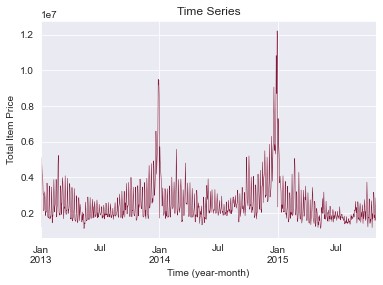

In [12]:
ax = all_data_by_date['item_price'].plot(linewidth=0.5)
ax.set_title('Time Series')
ax.set_xlabel("Time (year-month)")
ax.set_ylabel("Total Item Price")

In [13]:
#all_data_working = all_data[['date', 'item_price', 'shop_name']]
#all_data_working

In [14]:
#aggregations = {'item_price':'sum'}
#all_data_date_shop = all_data_working.groupby(['date', 'shop_name']).agg(aggregations)
#pd.set_option('display.float_format', '{:20,.2f}'.format)

In [15]:
#all_data_date_shop

In [16]:
#all_data_date_shop.plot(x=['date', 'shop_name'], y=['item_price'], figsize=(15,4))

In [17]:
all_data['Week'] = all_data.date.dt.week
all_data['Month'] = all_data.date.dt.month
all_data['Year'] = all_data.date.dt.year
all_data['dayofweek_name'] = all_data.date.dt.day_name()
all_data['dayofweek_day'] = all_data.date.dt.dayofweek 

all_data

,date,date_block_num,shop_id,item_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name,Week,Month,Year,dayofweek_name,dayofweek_day
0,2013-01-02,0,59,22154,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,1,2013,Wednesday,2
1,2013-01-03,0,25,2552,2552,899.00,1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,1,2013,Thursday,3
2,2013-01-05,0,25,2552,2552,899.00,-1.00,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,1,2013,Saturday,5
3,2013-01-06,0,25,2554,2554,"1,709.05",1.00,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,1,2013,Sunday,6
4,2013-01-15,0,25,2555,2555,"1,099.00",1.00,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум""",3,1,2013,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,7409,299.00,1.00,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",41,10,2015,Saturday,5
2935845,2015-10-09,33,25,7460,7460,299.00,1.00,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",41,10,2015,Friday,4
2935846,2015-10-14,33,25,7459,7459,349.00,1.00,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум""",42,10,2015,Wednesday,2
2935847,2015-10-22,33,25,7440,7440,299.00,1.00,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум""",43,10,2015,Thursday,3


In [18]:
all_data_working = all_data[['date', 'item_cnt_day', 'Week', 'Year']]
all_data_working

aggregations = {'item_cnt_day':'sum'}
all_data_by_week = all_data_working.groupby(['Year', 'Week']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_week.head()

item_cnt_day
Year Week                     
2013 1                  59,729
     2                  29,807
     3                  26,698
     4                  26,938
     5                  26,674

[Text(0, 0, '(2015, 25)'),
 Text(0, 0, '(2013, 1)'),
 Text(0, 0, '(2013, 21)'),
 Text(0, 0, '(2013, 41)'),
 Text(0, 0, '(2014, 9)'),
 Text(0, 0, '(2014, 29)'),
 Text(0, 0, '(2014, 49)'),
 Text(0, 0, '(2015, 17)'),
 Text(0, 0, '(2015, 37)'),
 Text(0, 0, '')]

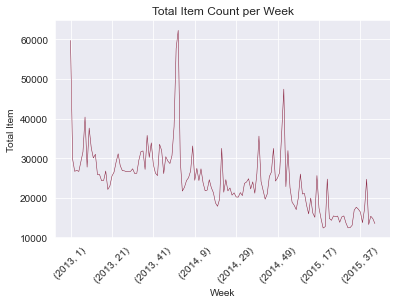

In [19]:
ax = all_data_by_week['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Total Item Count per Week')
ax.set_xlabel("Week")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [20]:
all_data_working = all_data[['date', 'item_cnt_day', 'Month', 'Year']]
all_data_working

aggregations = {'item_cnt_day':'sum'}
all_data_by_month = all_data_working.groupby(['Year', 'Month']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_month.head()

item_cnt_day
Year Month                     
2013 1                  131,479
     2                  128,090
     3                  147,142
     4                  107,190
     5                  106,970

[Text(0, 0, '(2015, 6)'),
 Text(0, 0, '(2013, 1)'),
 Text(0, 0, '(2013, 6)'),
 Text(0, 0, '(2013, 11)'),
 Text(0, 0, '(2014, 4)'),
 Text(0, 0, '(2014, 9)'),
 Text(0, 0, '(2015, 2)'),
 Text(0, 0, '(2015, 7)'),
 Text(0, 0, '')]

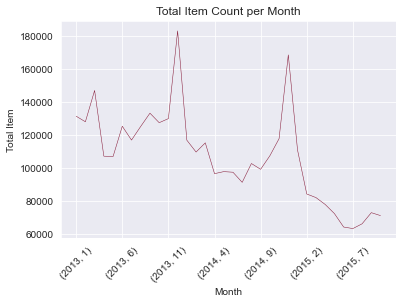

In [21]:
ax = all_data_by_month['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Total Item Count per Month')
ax.set_xlabel("Month")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [22]:
all_data_working = all_data[['date', 'item_cnt_day', 'Year']]
all_data_working

aggregations = {'item_cnt_day':'sum'}
all_data_by_year = all_data_working.groupby(['Year']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_year.head()

,item_cnt_day
Year,
2013,"1,562,733"
2014,"1,320,889"
2015,"764,584"


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

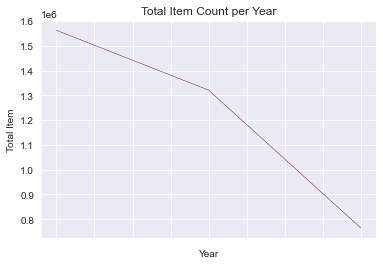

In [23]:
ax = all_data_by_year['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Total Item Count per Year')
ax.set_xlabel("Year")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [24]:
all_data_working = all_data[['date', 'item_cnt_day', 'Week', 'Year', 'dayofweek_name', 'dayofweek_day']]
all_data_working

aggregations = {'item_cnt_day':'sum'}
all_data_by_weekday = all_data_working.groupby(['Year', 'Week', 'dayofweek_name', 'dayofweek_day']).agg(aggregations)
pd.set_option('display.float_format', '{:20,.0f}'.format)
all_data_by_weekday.sort_values(by=['Year', 'Week', 'dayofweek_day', 'dayofweek_name'])

item_cnt_day
Year Week dayofweek_name dayofweek_day                     
2013 1    Monday         0                           12,823
          Tuesday        1                           12,465
          Wednesday      2                            8,198
          Thursday       3                            7,422
          Friday         4                            6,617
...                                                     ...
2015 44   Tuesday        1                            1,551
          Wednesday      2                            3,593
          Thursday       3                            1,589
          Friday         4                            2,274
          Saturday       5                            3,104

[1032 rows x 1 columns]

[Text(0, 0, '(2015, 16, Saturday, 5)'),
 Text(0, 0, '(2013, 1, Friday, 4)'),
 Text(0, 0, '(2013, 29, Thursday, 3)'),
 Text(0, 0, '(2014, 6, Monday, 0)'),
 Text(0, 0, '(2014, 34, Tuesday, 1)'),
 Text(0, 0, '(2015, 11, Tuesday, 1)'),
 Text(0, 0, '(2015, 40, Saturday, 5)'),
 Text(0, 0, '')]

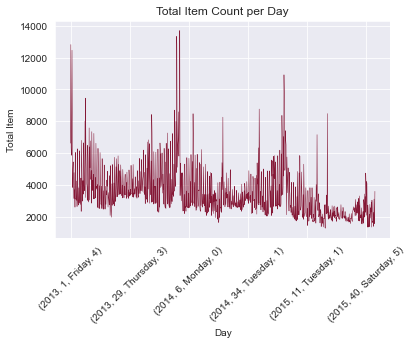

In [25]:
ax = all_data_by_weekday['item_cnt_day'].plot(linewidth=0.5)
ax.set_title('Total Item Count per Day')
ax.set_xlabel("Day")
ax.set_ylabel("Total Item")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [26]:
all_data['lag_1'] = all_data['item_cnt_day'].shift(1)
all_data['lag_2'] = all_data['item_cnt_day'].shift(2)
all_data['lag_3'] = all_data['item_cnt_day'].shift(3)
all_data['lag_4'] = all_data['item_cnt_day'].shift(4)
all_data['lag_5'] = all_data['item_cnt_day'].shift(5)
all_data['lag_6'] = all_data['item_cnt_day'].shift(6)
all_data['lag_7'] = all_data['item_cnt_day'].shift(7)
all_data

,date,date_block_num,shop_id,item_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,...,Year,dayofweek_name,dayofweek_day,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
0,2013-01-02,0,59,22154,22154,999,1,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,...,2013,Wednesday,2,nan,nan,nan,nan,nan,nan,nan
1,2013-01-03,0,25,2552,2552,899,1,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,...,2013,Thursday,3,1,nan,nan,nan,nan,nan,nan
2,2013-01-05,0,25,2552,2552,899,-1,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,...,2013,Saturday,5,1,1,nan,nan,nan,nan,nan
3,2013-01-06,0,25,2554,2554,"1,709",1,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,...,2013,Sunday,6,-1,1,1,nan,nan,nan,nan
4,2013-01-15,0,25,2555,2555,"1,099",1,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,...,2013,Tuesday,1,1,-1,1,1,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,7409,299,1,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,...,2015,Saturday,5,1,1,1,1,1,1,1
2935845,2015-10-09,33,25,7460,7460,299,1,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,...,2015,Friday,4,1,1,1,1,1,1,1
2935846,2015-10-14,33,25,7459,7459,349,1,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,...,2015,Wednesday,2,1,1,1,1,1,1,1
2935847,2015-10-22,33,25,7440,7440,299,1,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,...,2015,Thursday,3,1,1,1,1,1,1,1


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(all_data['item_cnt_day'], lags=10)
plot_pacf(all_data['item_cnt_day'], lags=10)

In [ ]:
all_data['rolling_mean'] = all_data['item_cnt_day'].rolling(window=7).mean()
all_data

In [ ]:
all_data['expanding_mean'] = all_data['item_cnt_day'].expanding(2).mean()
all_data